# Combined Phases: CNN for Animals10 Dataset
This notebook implements all three phases for training and evaluating CNN models on the Animals10 dataset. Each phase has its own constraints and improvements:
1. Phase 1: Model with 1,400,000 parameters.
2. Phase 2: Model with 400,000 parameters.
3. Phase 3: Overfitting prevention for both models.

Each phase includes:
- Training and evaluation.
- ROC curve.
- Learning curves.
- Confusion matrix.
- Visualization of predictions.
- Classification report.

In [2]:
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import numpy as np
import seaborn as sns
from sklearn.preprocessing import label_binarize

# Constants
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
NUM_CLASSES = 10

# Directories (Update these paths as needed)
train_dir = './dataset/train'
val_dir = './dataset/val'
test_dir = './dataset/test'


## Data Generators
Define the data generators for training, validation, and testing.

In [3]:
def create_data_generators():
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    val_test_datagen = ImageDataGenerator(rescale=1./255)
    
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical'
    )
    val_generator = val_test_datagen.flow_from_directory(
        val_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical'
    )
    test_generator = val_test_datagen.flow_from_directory(
        test_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=False
    )
    return train_generator, val_generator, test_generator

train_generator, val_generator, test_generator = create_data_generators()

Found 16938 images belonging to 10 classes.
Found 2425 images belonging to 10 classes.
Found 4846 images belonging to 10 classes.


## Training and Evaluation Utilities
Define helper functions for training and evaluation.

In [4]:
def train_model(model, train_gen, val_gen, epochs=20):
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=epochs,
        callbacks=[early_stopping]
    )
    return history

def plot_learning_curves(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')
    plt.show()

def evaluate_model(model, test_gen):
    test_loss, test_accuracy = model.evaluate(test_gen)
    print(f"Test Loss: {test_loss}")
    print(f"Test Accuracy: {test_accuracy}")

    y_true = test_gen.classes
    y_pred_prob = model.predict(test_gen)
    y_pred = np.argmax(y_pred_prob, axis=1)
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_gen.class_indices.keys(), yticklabels=test_gen.class_indices.keys())
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=test_gen.class_indices.keys()))
    
    y_true_binary = label_binarize(y_true, classes=list(range(NUM_CLASSES)))
    plt.figure(figsize=(12, 8))
    for i in range(NUM_CLASSES):
        fpr, tpr, _ = roc_curve(y_true_binary[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {list(test_gen.class_indices.keys())[i]} (AUC: {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()


## Phase 1: Training and Evaluation
**Best Parameters:**
- Filters: `[32, 64, 128]`
- Dense Units: `512`
- Learning Rate: `0.001`


Epoch 1/20
530/530 [==============================] - 550s 1s/step - loss: 2.0143 - accuracy: 0.2895 - val_loss: 1.7574 - val_accuracy: 0.3930
Epoch 2/20
530/530 [==============================] - 363s 684ms/step - loss: 1.6494 - accuracy: 0.4266 - val_loss: 1.4348 - val_accuracy: 0.4994
Epoch 3/20
530/530 [==============================] - 438s 825ms/step - loss: 1.4653 - accuracy: 0.4932 - val_loss: 1.4308 - val_accuracy: 0.5105
Epoch 4/20
530/530 [==============================] - 290s 546ms/step - loss: 1.3495 - accuracy: 0.5354 - val_loss: 1.2707 - val_accuracy: 0.5571
Epoch 5/20
530/530 [==============================] - 283s 533ms/step - loss: 1.2716 - accuracy: 0.5632 - val_loss: 1.2299 - val_accuracy: 0.5703
Epoch 6/20
530/530 [==============================] - 354s 668ms/step - loss: 1.1915 - accuracy: 0.5913 - val_loss: 1.1479 - val_accuracy: 0.6049
Epoch 7/20
530/530 [==============================] - 286s 540ms/step - loss: 1.1477 - accuracy: 0.6045 - val_loss: 1.3417 - va

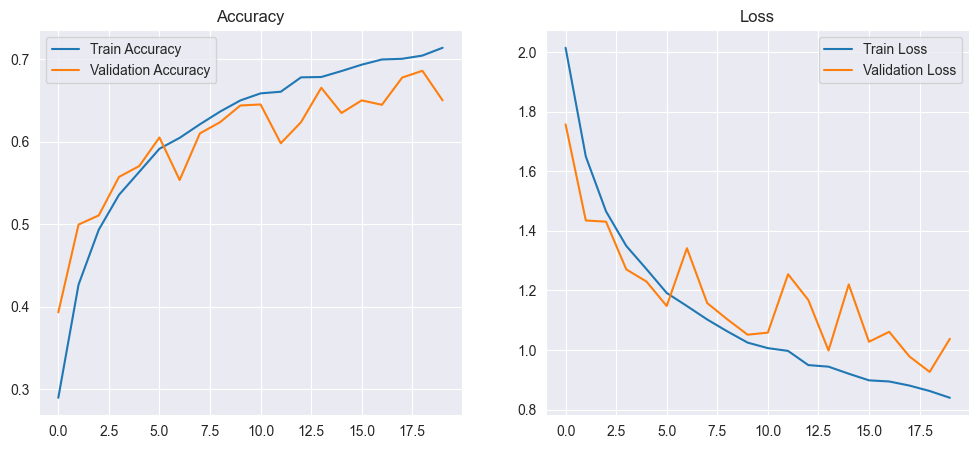

152/152 [==============================] - 21s 137ms/step - loss: 1.0272 - accuracy: 0.6564
Test Loss: 1.0271986722946167
Test Accuracy: 0.6564176678657532
152/152 [==============================] - 17s 107ms/step


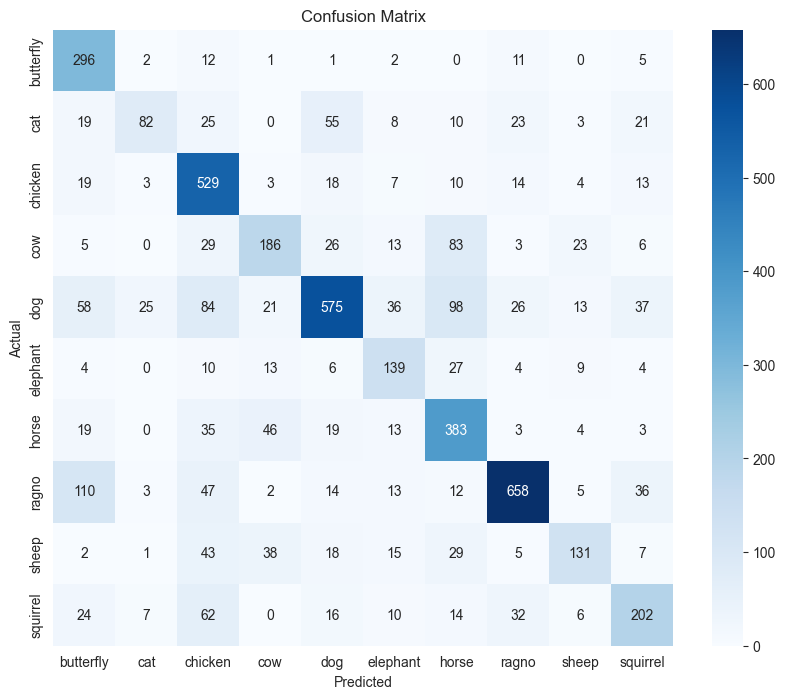

Classification Report:
              precision    recall  f1-score   support

   butterfly       0.53      0.90      0.67       330
         cat       0.67      0.33      0.44       246
     chicken       0.60      0.85      0.71       620
         cow       0.60      0.50      0.54       374
         dog       0.77      0.59      0.67       973
    elephant       0.54      0.64      0.59       216
       horse       0.58      0.73      0.64       525
       ragno       0.84      0.73      0.78       900
       sheep       0.66      0.45      0.54       289
    squirrel       0.60      0.54      0.57       373

    accuracy                           0.66      4846
   macro avg       0.64      0.63      0.62      4846
weighted avg       0.68      0.66      0.65      4846



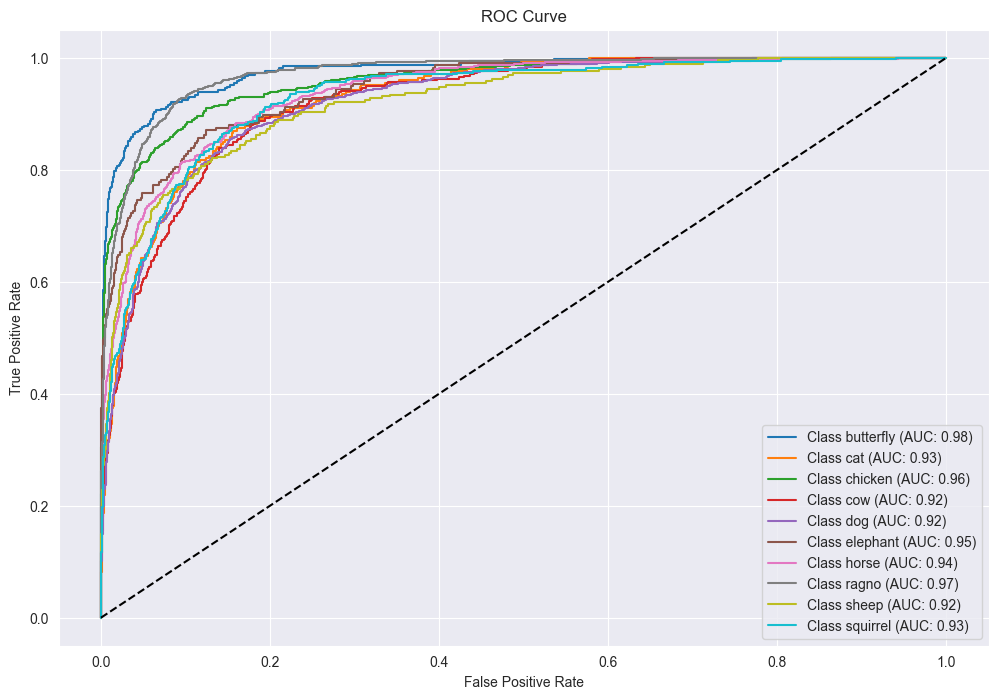

In [5]:
def create_phase_1_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(NUM_CLASSES, activation='softmax')
    ])
    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Phase 1 Execution
model_phase_1 = create_phase_1_model()
history_phase_1 = train_model(model_phase_1, train_generator, val_generator)
plot_learning_curves(history_phase_1)
evaluate_model(model_phase_1, test_generator)

## Phase 2: Training and Evaluation
**Best Parameters:**
- Filters: `[16, 32, 64]`
- Dense Units: `256`
- Learning Rate: `0.001`


Epoch 1/20
530/530 [==============================] - 152s 285ms/step - loss: 1.9614 - accuracy: 0.3009 - val_loss: 1.6929 - val_accuracy: 0.4066
Epoch 2/20
530/530 [==============================] - 152s 287ms/step - loss: 1.6256 - accuracy: 0.4328 - val_loss: 1.4379 - val_accuracy: 0.5085
Epoch 3/20
530/530 [==============================] - 149s 281ms/step - loss: 1.4734 - accuracy: 0.4936 - val_loss: 1.4956 - val_accuracy: 0.4755
Epoch 4/20
530/530 [==============================] - 146s 275ms/step - loss: 1.3693 - accuracy: 0.5331 - val_loss: 1.4298 - val_accuracy: 0.4936
Epoch 5/20
530/530 [==============================] - 146s 274ms/step - loss: 1.2855 - accuracy: 0.5589 - val_loss: 1.2137 - val_accuracy: 0.5946
Epoch 6/20
530/530 [==============================] - 144s 272ms/step - loss: 1.2390 - accuracy: 0.5734 - val_loss: 1.1603 - val_accuracy: 0.5959
Epoch 7/20
530/530 [==============================] - 145s 273ms/step - loss: 1.2024 - accuracy: 0.5872 - val_loss: 1.2415 -

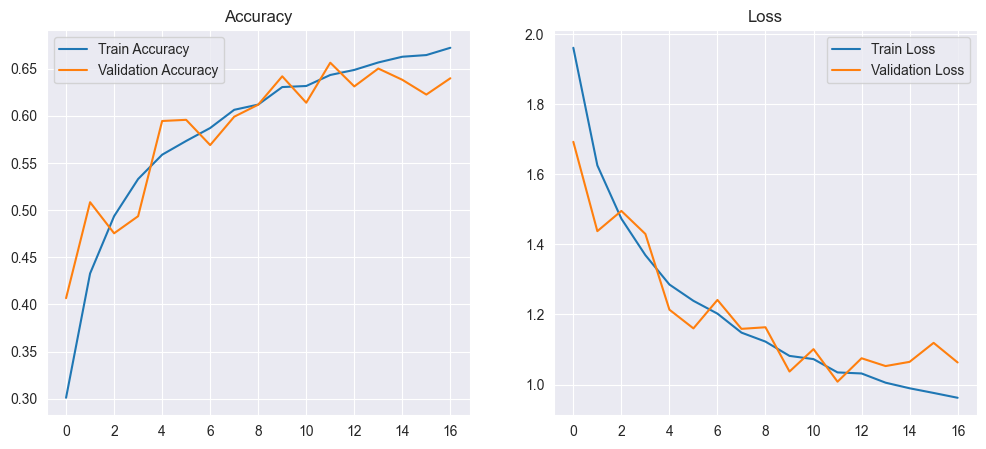

152/152 [==============================] - 8s 50ms/step - loss: 0.9835 - accuracy: 0.6700
Test Loss: 0.983547031879425
Test Accuracy: 0.6700371503829956
152/152 [==============================] - 9s 56ms/step


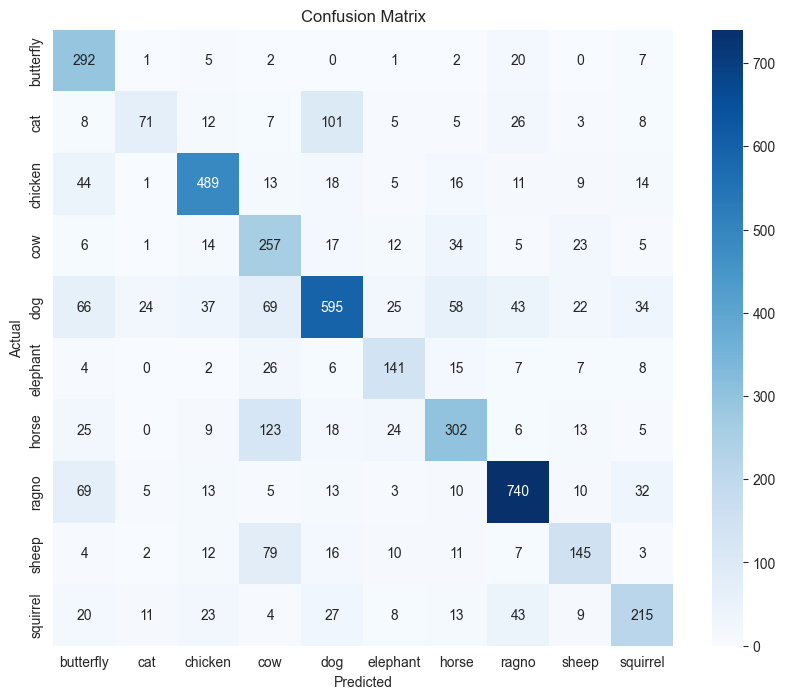

Classification Report:
              precision    recall  f1-score   support

   butterfly       0.54      0.88      0.67       330
         cat       0.61      0.29      0.39       246
     chicken       0.79      0.79      0.79       620
         cow       0.44      0.69      0.54       374
         dog       0.73      0.61      0.67       973
    elephant       0.60      0.65      0.63       216
       horse       0.65      0.58      0.61       525
       ragno       0.81      0.82      0.82       900
       sheep       0.60      0.50      0.55       289
    squirrel       0.65      0.58      0.61       373

    accuracy                           0.67      4846
   macro avg       0.64      0.64      0.63      4846
weighted avg       0.69      0.67      0.67      4846



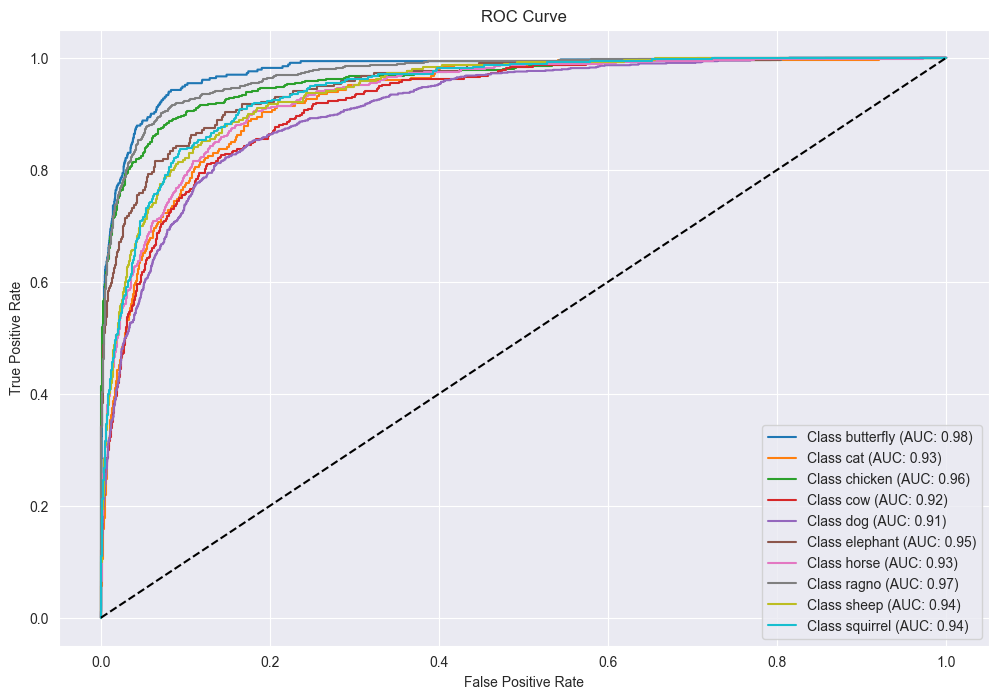

In [6]:
def create_phase_2_model():
    model = models.Sequential([
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(NUM_CLASSES, activation='softmax')
    ])
    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Phase 2 Execution
model_phase_2 = create_phase_2_model()
history_phase_2 = train_model(model_phase_2, train_generator, val_generator)
plot_learning_curves(history_phase_2)
evaluate_model(model_phase_2, test_generator)

## Phase 3: Training and Evaluation (Overfitting Prevention)
**Best Parameters:**
- Filters: `[32, 64, 128]`
- Dropout: `0.3, 0.4, 0.5`
- Dense Units: `256`
- Learning Rate: `0.001`


In [7]:
def create_phase_3_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(NUM_CLASSES, activation='softmax')
    ])
    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Phase 3 Execution
model_phase_3 = create_phase_3_model()
history_phase_3 = train_model(model_phase_3, train_generator, val_generator)
plot_learning_curves(history_phase_3)
evaluate_model(model_phase_3, test_generator)

Epoch 1/20
 40/530 [=>............................] - ETA: 4:07 - loss: 2.3873 - accuracy: 0.1867

KeyboardInterrupt: 